In [1]:
import pandas as pd

df = pd.read_csv("../data/PaySim_historical.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
print(df.info())
print()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726358 entries, 0 to 5726357
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 480.6+ MB
None



,count,mean,std,min,25%,50%,75%,max
step,5726358.0,2.147936e+02,1.147727e+02,1.0,139.0000,227.000,3.070000e+02,3.990000e+02
amount,5726358.0,1.812735e+05,6.214457e+05,0.0,13455.6925,75458.730,2.097209e+05,9.244552e+07
oldbalanceOrg,5726358.0,8.438408e+05,2.926725e+06,0.0,0.0000,13839.000,1.072830e+05,4.489219e+07
newbalanceOrig,5726358.0,8.657735e+05,2.963509e+06,0.0,0.0000,0.000,1.447034e+05,4.368662e+07
oldbalanceDest,5726358.0,1.090567e+06,3.314184e+06,0.0,0.0000,135845.815,9.474152e+05,3.555534e+08
newbalanceDest,5726358.0,1.218558e+06,3.617289e+06,0.0,0.0000,218659.025,1.119614e+06,3.560159e+08
isFraud,5726358.0,7.769336e-04,2.786270e-02,0.0,0.0000,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,5726358.0,6.985243e-07,8.357774e-04,0.0,0.0000,0.000,0.000000e+00,1.000000e+00


Nombre de fraudes par type de transaction :
type
CASH_IN        0
CASH_OUT    2234
DEBIT          0
PAYMENT        0
TRANSFER    2215
Name: isFraud, dtype: int64

Distribution des transactions frauduleuses vs non frauduleuses :
type
CASH_IN     1257643
CASH_OUT    2025462
DEBIT         36772
PAYMENT     1930348
TRANSFER     476133
Name: isFraud, dtype: int64


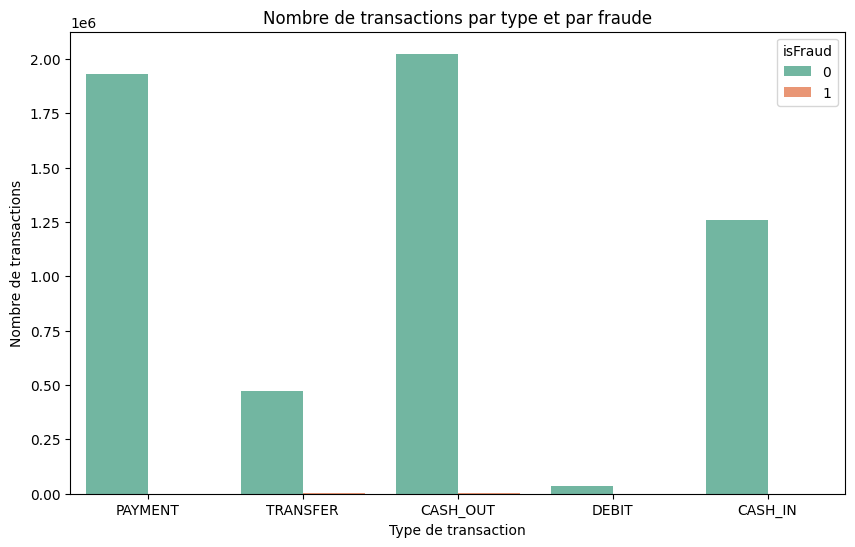

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


type_de_fraudes = df.groupby('type')['isFraud'].sum()
distribution_fraudes = df.groupby('type')['isFraud'].count()

print("Nombre de fraudes par type de transaction :")
print(type_de_fraudes)

print("\nDistribution des transactions frauduleuses vs non frauduleuses :")
print(distribution_fraudes)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud', palette='Set2')
plt.title("Nombre de transactions par type et par fraude")
plt.xlabel("Type de transaction")
plt.ylabel("Nombre de transactions")
plt.savefig("bar_chart_types.png")

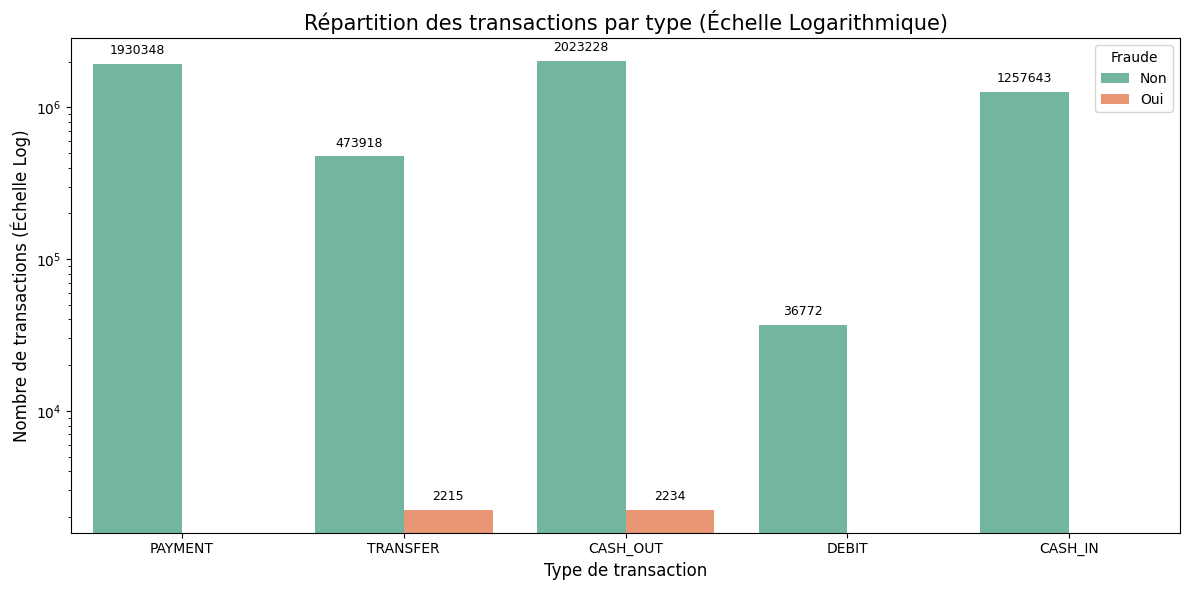

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# On définit la taille de la figure
plt.figure(figsize=(12, 6))

# Utilisation de sns.countplot avec une échelle logarithmique
ax = sns.countplot(data=df, x='type', hue='isFraud', palette='Set2')

# --- L'ASTUCE EST ICI : Passage en échelle logarithmique ---
ax.set_yscale("log")

# On ajoute les titres et labels
plt.title("Répartition des transactions par type (Échelle Logarithmique)", fontsize=15)
plt.xlabel("Type de transaction", fontsize=12)
plt.ylabel("Nombre de transactions (Échelle Log)", fontsize=12)
plt.legend(title='Fraude', labels=['Non', 'Oui'], loc='upper right')

# Optionnel : Ajouter le nombre exact au-dessus de chaque barre pour plus de clarté
for p in ax.patches:
    height = p.get_height()
    if height > 0: # Éviter d'annoter les barres vides
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', 
                    fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.savefig("bar_chart_types_optimized.png")

C:\Users\jb_le\AppData\Local\Temp\ipykernel_12800\1409637691.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_fraude['amount'], kde=True, palette='Set2', log_scale=True)
c:\Users\jb_le\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


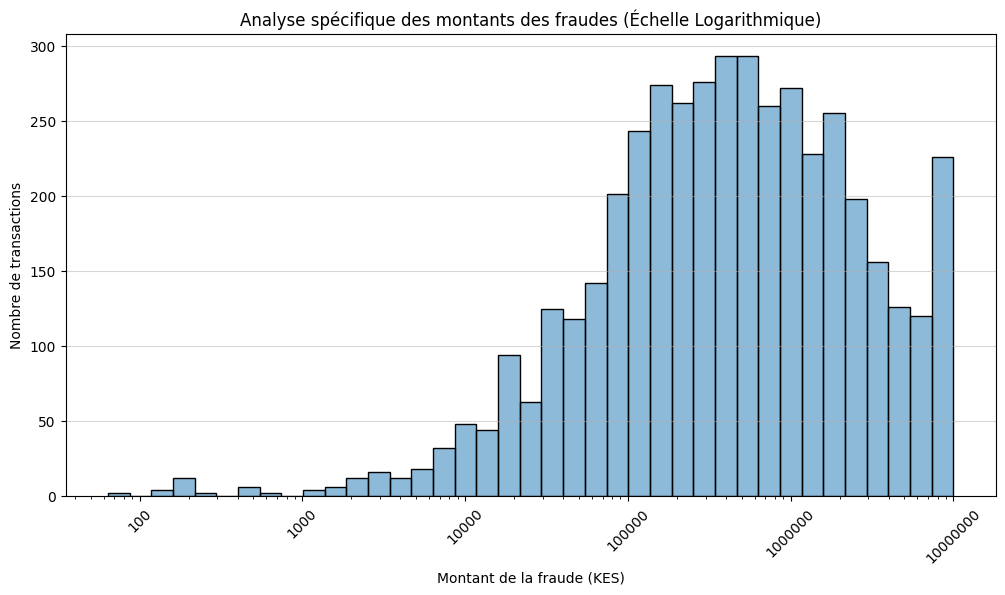

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.ticker as ticker


df_fraude = df[df['isFraud'] == 1]

plt.figure(figsize=(12, 6))


sns.histplot(df_fraude['amount'], kde=True, palette='Set2', log_scale=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)

plt.title('Analyse spécifique des montants des fraudes (Échelle Logarithmique)')
plt.xlabel('Montant de la fraude (KES)')
plt.ylabel('Nombre de transactions')
plt.grid(axis='y', alpha=0.5)

plt.show()
plt.savefig("histogramme_final.png")

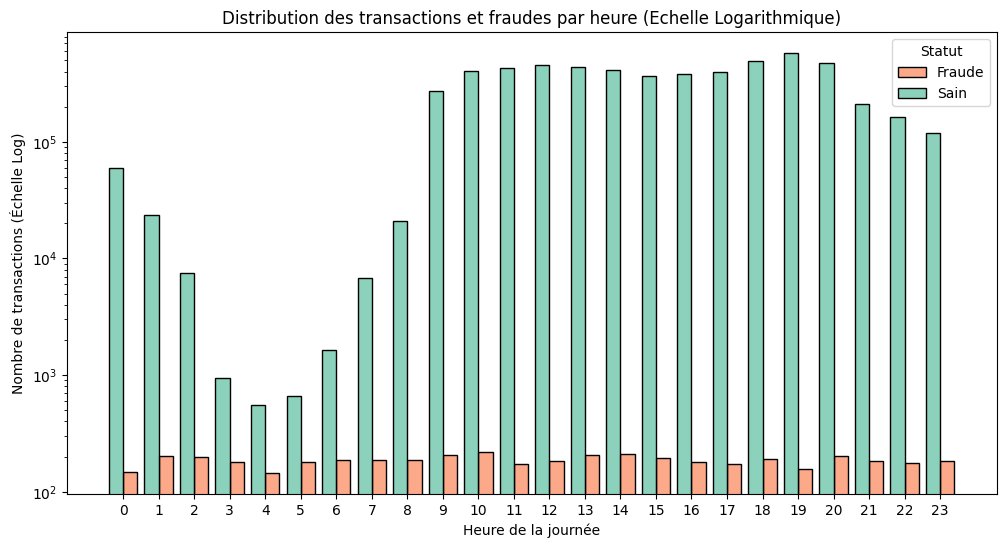

In [74]:
df['heure'] = df['step'] % 24

plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='heure',
    hue='isFraud',
    multiple='dodge', 
    discrete=True,
    shrink=0.8,
    palette='Set2'
)

plt.yscale('log') 
plt.xticks(range(0, 24))
plt.title('Distribution des transactions et fraudes par heure (Echelle Logarithmique)')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de transactions (Échelle Log)')
plt.legend(title='Statut', labels=['Fraude', 'Sain'])

plt.savefig("histplot_heures2.png")
plt.show()

In [54]:
df_fraud = df[df['isFraud'] == 1].copy()

# 2. On extrait la première lettre (C ou M) des noms
df_fraud['type_Orig'] = df_fraud['nameOrig'].str[0]
df_fraud['type_Dest'] = df_fraud['nameDest'].str[0]

# 3. On fait le GroupBy pour compter
print("Répartition des comptes à l'ORIGINE des fraudes :")
print(df_fraud.groupby('type_Orig').size())

print("\nRépartition des comptes à la DESTINATION des fraudes :")
print(df_fraud.groupby('type_Dest').size())

Répartition des comptes à l'ORIGINE des fraudes :
type_Orig
C    4449
dtype: int64

Répartition des comptes à la DESTINATION des fraudes :
type_Dest
C    4449
dtype: int64


In [55]:
# 1. On crée une liste des nameDest impliqués dans une fraude
fraud_dest_counts = df[df['isFraud'] == 1]['nameDest'].value_counts()

# 2. On affiche les comptes qui apparaissent le plus souvent comme receveurs de fraude
print("Comptes destinataires ayant reçu plusieurs fraudes :")
print(fraud_dest_counts[fraud_dest_counts > 1])

# 3. Pour aller plus loin : quel est le max de fraudes reçues par un seul compte ?
print(f"\nNombre maximum de fraudes reçues par un seul compte : {fraud_dest_counts.max()}")

Comptes destinataires ayant reçu plusieurs fraudes :
nameDest
C2020337583    2
C1827219533    2
C1981613973    2
C935310781     2
C1366192319    2
C644163395     2
C1601170327    2
C904300960     2
C104038589     2
C1259079602    2
C200064275     2
C967226405     2
C1497532505    2
C410033330     2
C1325541393    2
C185805228     2
C52390890      2
C2129197098    2
C105660024     2
C803116137     2
C1013511446    2
C1399829166    2
C650699445     2
C643624257     2
C1653587362    2
Name: count, dtype: int64

Nombre maximum de fraudes reçues par un seul compte : 2


In [56]:
# On regarde le taux de fraude par compte destinataire
dest_stats = df.groupby('nameDest')['isFraud'].agg(['count', 'sum'])
dest_stats.columns = ['total_transactions', 'total_fraudes']

# On affiche les comptes qui ont reçu au moins 2 transactions et dont 100% sont des fraudes
comptes_suspects = dest_stats[(dest_stats['total_transactions'] > 1) & 
                              (dest_stats['total_transactions'] == dest_stats['total_fraudes'])]

print(f"Nombre de comptes ayant reçu plusieurs transactions, toutes frauduleuses : {len(comptes_suspects)}")

Nombre de comptes ayant reçu plusieurs transactions, toutes frauduleuses : 0


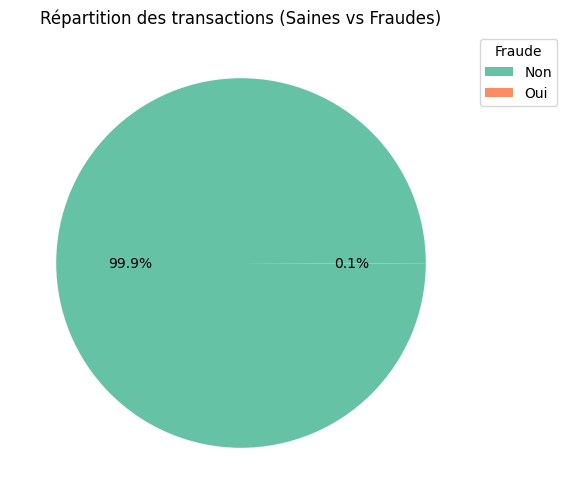

In [72]:
# On compte le nombre de fraudes (1) et de transactions saines (0)
counts = df['isFraud'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, autopct='%.1f%%', colors = plt.get_cmap('Set2').colors)
plt.title("Répartition des transactions (Saines vs Fraudes)")
plt.legend(title='Fraude', labels=['Non', 'Oui'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.savefig("pie_chart_fraude.png")

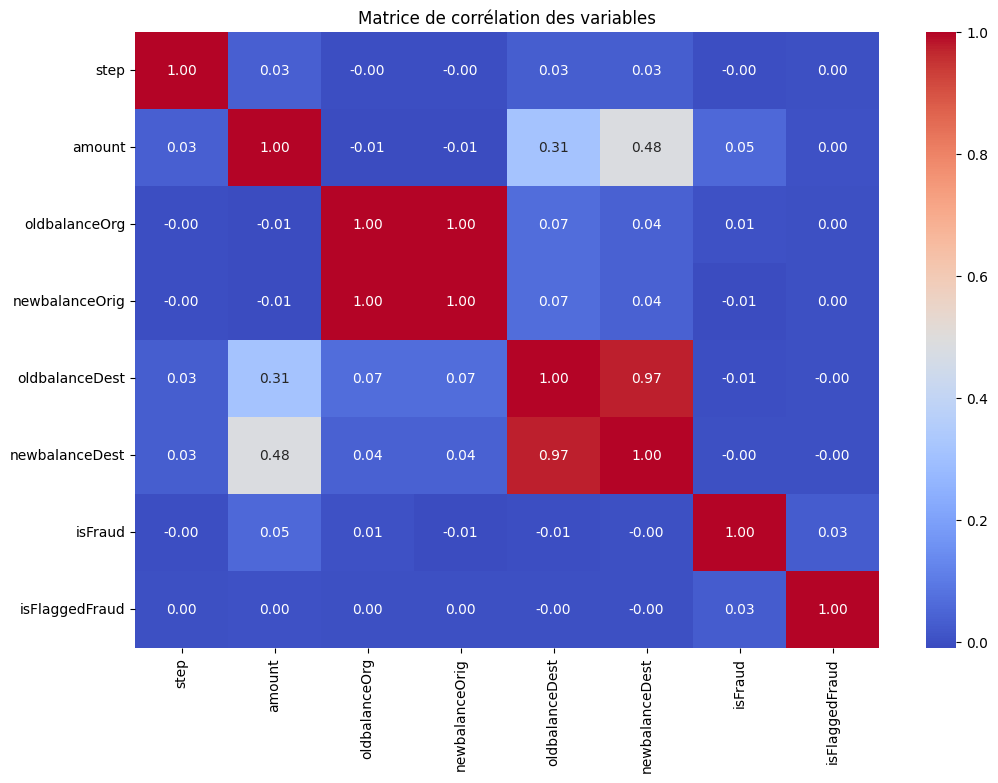

In [58]:
plt.figure(figsize=(12, 8))
# On ne garde que les colonnes numériques pour le calcul
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des variables")
plt.savefig("heatmap_correlation.png")